# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_sparc4acs1_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:15.805000,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:19.925063,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:24.045125,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:28.165188,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:32.285251,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:02:58.767000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,12,L4,None,True
967,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:04:41.312000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,13,L4,None,True
968,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:06:23.713000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,14,L4,None,True
969,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:08:06.116000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   39R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

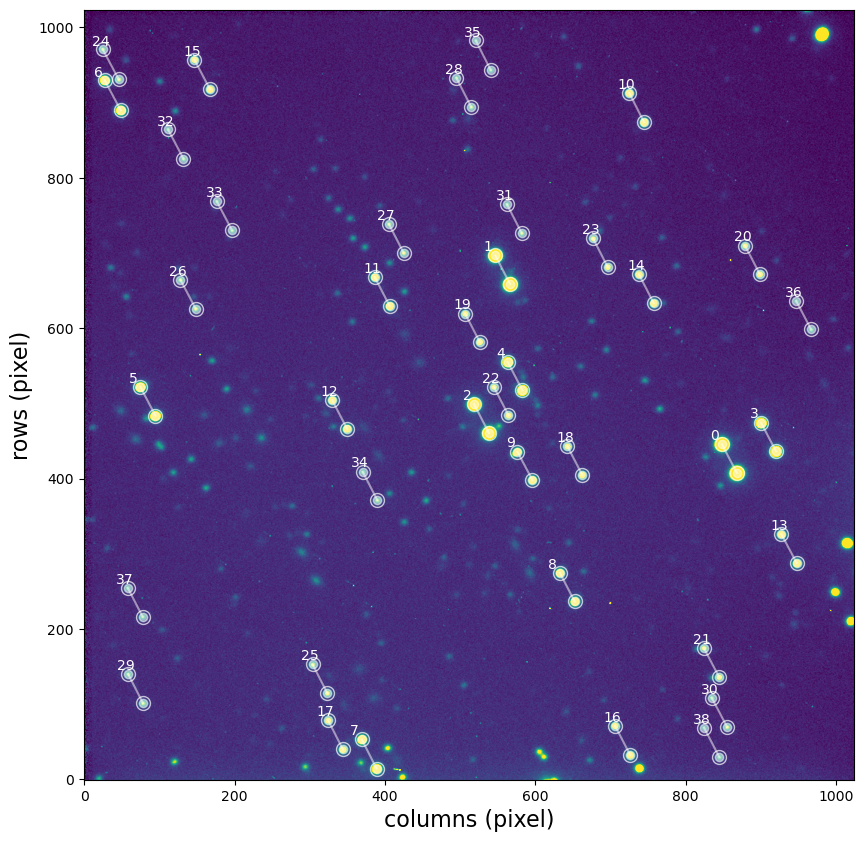

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.527363,-38.716308,868.009918,407.634860,7.140808,7.140808,-9.144403,0.001914,-7.817753,0.001391,10,0
1,1,189.564747,-38.693962,566.330584,658.691347,7.059725,7.059725,-8.925953,0.002167,-7.810767,0.001188,10,0
2,2,189.567156,-38.712576,538.205945,460.818153,7.122254,7.122254,-8.682627,0.002535,-7.827075,0.001257,10,0
3,3,189.521251,-38.713446,920.049455,436.291641,7.077753,7.077753,-7.963880,0.004147,-7.814056,0.001440,10,0
4,4,189.562076,-38.707137,582.761027,517.431563,7.012154,7.012154,-7.798348,0.004655,-7.821154,0.001344,10,0
5,5,189.620501,-38.712087,94.849308,483.577291,7.122375,7.122375,-7.582411,0.005361,-7.813259,0.001083,10,0
6,6,189.628196,-38.674089,48.550270,889.868112,7.334727,7.334727,-7.397693,0.006150,-7.782911,0.001189,10,0
7,7,189.582851,-38.754866,388.808199,14.406570,7.035596,7.035596,-7.218687,0.007274,-7.843482,0.001329,10,0
8,8,189.552351,-38.733134,652.339384,236.517016,6.951908,6.951908,-6.879686,0.009267,-7.821947,0.001042,10,0
9,9,189.559931,-38.718275,596.082227,398.188724,7.467014,7.467014,-6.797582,0.010161,-7.830389,0.001328,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

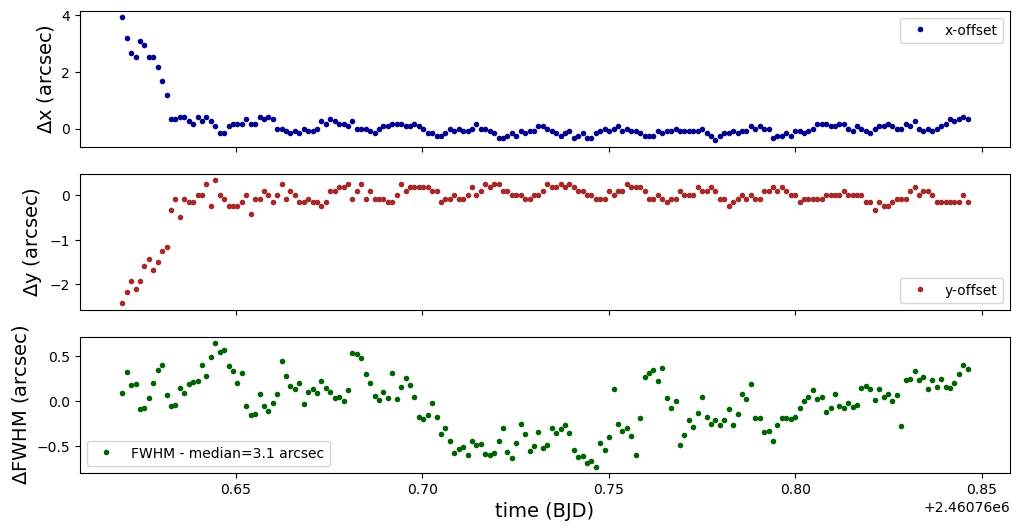

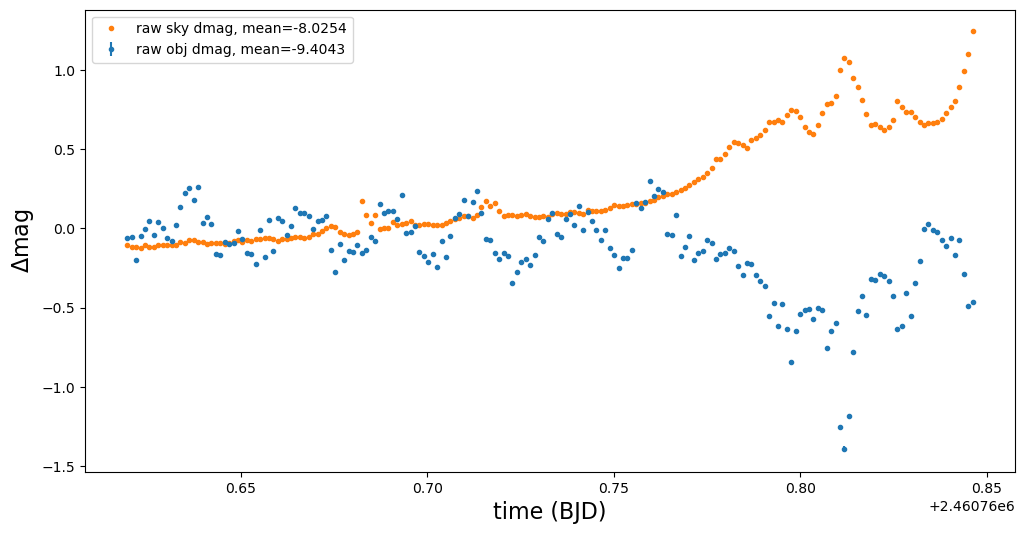

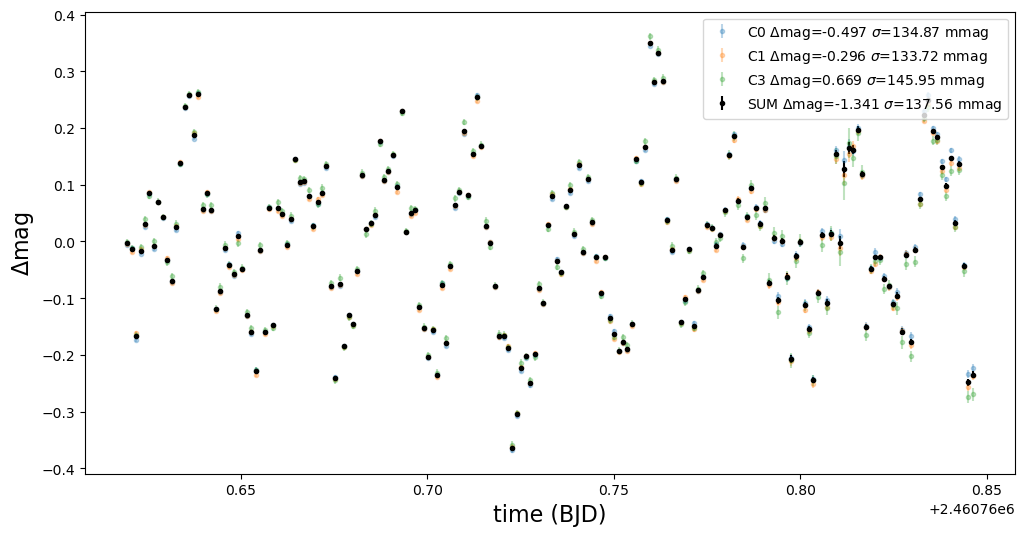

       TIME                x         ...       diffmagsum      
------------------ ----------------- ... ----------------------
 2460760.619578606 528.3580634277725 ... -0.0034220771625896873
 2460760.620766189 526.1080634277725 ...    -0.0137007319968383
 2460760.621951422 524.6080634277725 ...   -0.16644097659746393
2460760.6231369334 524.1080634277725 ...  -0.015900244446065415
 2460760.624324134 525.8580634277725 ...   0.030190944392245456
 2460760.625509368 525.3580634277725 ...    0.08476639858375457
2460760.6266968925 524.1080634277725 ...  -0.008200981399532736
               ...               ... ...                    ...
 2460760.839059969 516.8580634277725 ...    0.09852296233383484
  2460760.84024718 517.1080634277725 ...    0.14705459774150498
 2460760.841433025 517.6080634277725 ...    0.03305596703315672
 2460760.842619923 517.3580634277725 ...      0.137302500038885
 2460760.843805155 517.6080634277725 ...   -0.04350185652253025
 2460760.844990409 517.8580634277725 ...

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=2
comps=[0,1,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1179   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1618   39R x 803C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0189,EFE0189,FO0190,EFO0190,FE0190,EFE0190,FO0191,EFO0191,FE0191,EFE0191
0,2.0,10.0,0.0,189.527363,-38.716308,848.037149,445.762891,868.009918,407.634860,6.429529,...,4322.597809,16.288429,3640.957653,16.551245,4262.200618,16.798856,3697.516928,17.662842,4314.498751,17.770225
1,2.0,10.0,1.0,189.564747,-38.693962,546.811822,696.692801,566.330584,658.691347,6.450499,...,3618.583440,15.668957,3059.451782,16.009970,3646.484038,16.305648,3076.589877,16.830640,3672.914457,17.415876
2,2.0,10.0,2.0,189.567156,-38.712576,518.510181,498.945043,538.205945,460.818153,6.538892,...,2569.044989,15.575298,1883.724777,15.963426,2146.104582,16.072736,1949.832960,17.029351,2178.415895,17.179708
3,2.0,10.0,3.0,189.521251,-38.713446,900.185232,474.220872,920.049455,436.291641,6.326058,...,1493.347502,15.698044,1271.068306,16.018996,1528.955600,16.112064,1286.604527,17.158092,1568.868960,17.167007
4,2.0,10.0,4.0,189.562076,-38.707137,563.203967,555.259326,582.761027,517.431563,6.372790,...,1281.032425,15.389724,1027.430356,15.442528,1277.701375,15.843862,1094.763672,16.628367,1260.530481,16.885103
5,2.0,10.0,5.0,189.620501,-38.712087,74.720033,521.855599,94.849308,483.577291,6.562646,...,969.457099,14.366732,863.133534,14.986693,933.120428,15.066629,882.242567,15.956918,975.261298,15.851545
6,2.0,10.0,6.0,189.628196,-38.674089,27.232027,929.726359,48.550270,889.868112,6.615406,...,818.289316,14.308143,717.929880,14.970452,793.298744,14.966539,747.078054,15.603109,787.639669,15.927386
7,2.0,10.0,7.0,189.582851,-38.754866,369.222511,53.059042,388.808199,14.406570,6.499537,...,778.813199,14.623204,630.011854,15.363471,779.596467,15.735793,649.103023,16.589778,765.845764,16.628497
8,2.0,10.0,8.0,189.552351,-38.733134,632.592603,274.695639,652.339384,236.517016,6.428064,...,534.320113,14.801466,469.140997,15.271645,551.014608,15.357404,501.029082,16.314691,587.720281,16.386635
9,2.0,10.0,9.0,189.559931,-38.718275,576.113719,435.731305,596.082227,398.188724,6.558897,...,447.054475,14.814075,413.878542,15.444800,426.960000,15.707347,421.808687,16.287296,423.994280,16.528409


Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0189', 'EFE0189', 'FO0190', 'EFO0190', 'FE0190', 'EFE0190', 'FO0191',
       'EFO0191', 'FE0191', 'EFE0191'],
      dtype='object', length=803)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:07:15,610 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:07:15,610 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:07:15,623 root - INFO - Source index: i=2   [pipeline_lib]


2025-09-18 01:07:15,623 | INFO | Source index: i=2 


2025-09-18 01:07:15,624 root - INFO - Source RA=189.5671558300231 Dec=-38.712575593454545 mag=-15.1793+-0.0004  [pipeline_lib]


2025-09-18 01:07:15,624 | INFO | Source RA=189.5671558300231 Dec=-38.712575593454545 mag=-15.1793+-0.0004


2025-09-18 01:07:15,624 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-18 01:07:15,624 | INFO | Best aperture radius: 20.0 pixels


2025-09-18 01:07:15,625 root - INFO - Polarization in Q: 0.0027+-0.0008  [pipeline_lib]


2025-09-18 01:07:15,625 | INFO | Polarization in Q: 0.0027+-0.0008


2025-09-18 01:07:15,626 root - INFO - Polarization in U: -0.002+-0.001  [pipeline_lib]


2025-09-18 01:07:15,626 | INFO | Polarization in U: -0.002+-0.001


2025-09-18 01:07:15,627 root - INFO - Polarization in V: -0.0005+-0.0007  [pipeline_lib]


2025-09-18 01:07:15,627 | INFO | Polarization in V: -0.0005+-0.0007


2025-09-18 01:07:15,628 root - INFO - Total linear polarization p: 0.003+-0.001  [pipeline_lib]


2025-09-18 01:07:15,628 | INFO | Total linear polarization p: 0.003+-0.001


2025-09-18 01:07:15,629 root - INFO - Angle of polarization theta: 162+-9 deg  [pipeline_lib]


2025-09-18 01:07:15,629 | INFO | Angle of polarization theta: 162+-9 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:07:15,631 root - INFO - Free constant k: 0.8782516067902065+-0.0  [pipeline_lib]


2025-09-18 01:07:15,631 | INFO | Free constant k: 0.8782516067902065+-0.0


2025-09-18 01:07:15,632 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-09-18 01:07:15,632 | INFO | Zero of polarization: 28.2+-0.0


2025-09-18 01:07:15,633 root - INFO - RMS of zi residuals: 0.008406030724874123  [pipeline_lib]


2025-09-18 01:07:15,633 | INFO | RMS of zi residuals: 0.008406030724874123


2025-09-18 01:07:15,634 root - INFO - Reduced chi-square (n=192.0, DOF=189.0): 2.09  [pipeline_lib]


2025-09-18 01:07:15,634 | INFO | Reduced chi-square (n=192.0, DOF=189.0): 2.09


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:07:15,723 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:07:15,723 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:07:15,727 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:07:15,727 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:07:15,951 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:07:15,951 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:07:15,956 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:07:15,956 | INFO | Substituting symbol \perp from STIXGeneral


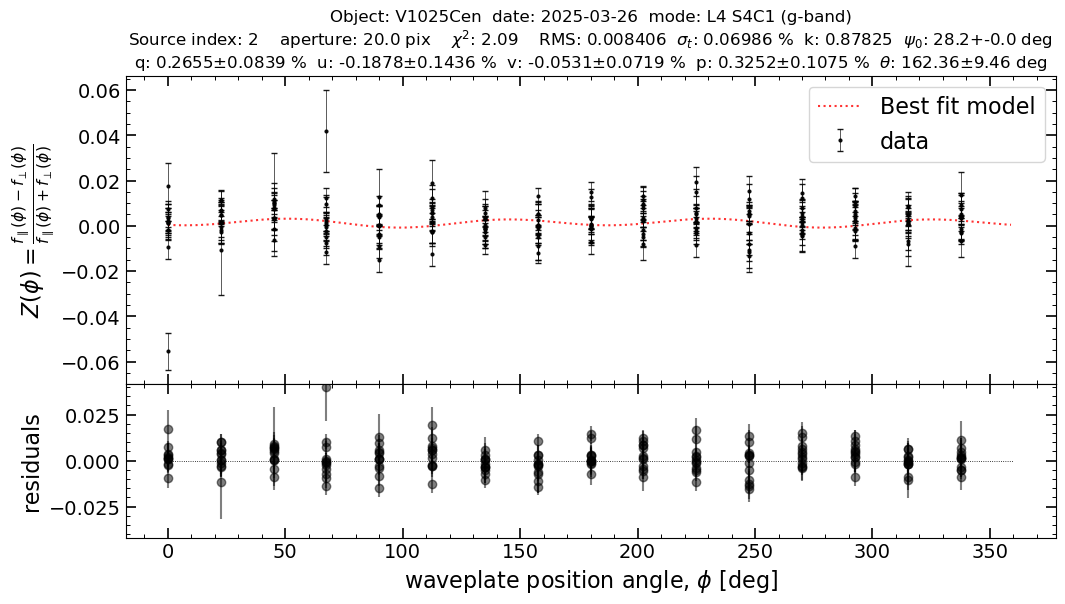

In [11]:
source_index = 2

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs1/20250325_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 2
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 192
MAG : -15.1793+-0.0004
RA : 189.5671558300231
DEC : -38.712575593454545
FWHM : 6.538891666241952
X1 : 518.5101814168486
Y1 : 498.9450426726224
X2 : 538.2059454386965
Y2 : 460.8181528139543
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.3+-0.1 %  Angle of polarization: 162+-9 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

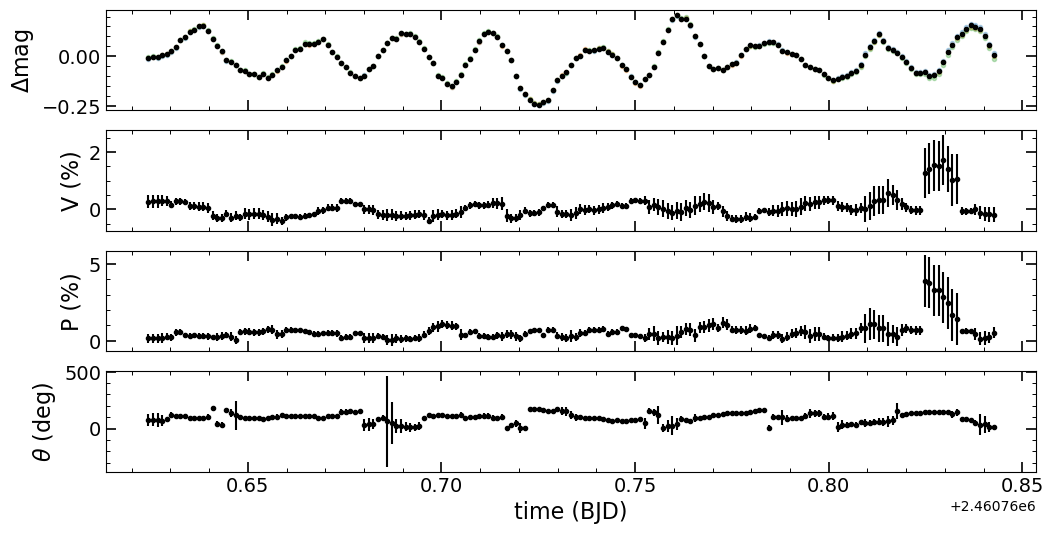

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.012549822562419877,0.0011829459152920669,-0.008167745590204945,0.0012357497750618955,-0.006473449805481479,0.002014377474976673,2460760.6243090695,518.5101814168486,498.9450426726224,538.2059454386965,460.8181528139543,6.809025465786998,-11.725175191537463,0.0009762185331997674,-13.066298474728402,0.0020310458594224286,-0.009944207235204061,0.0015413137378735896,0.0029672972951119126,76.74455119158615,55.05997938958282
-0.006553049029742297,0.0011780924053920844,-0.002063826604782548,0.0012306806890504934,-0.0009130674940625028,0.0020099902525054967,2460760.625495767,516.2601814168486,499.6950426726224,535.9559454386965,461.5681528139543,6.901418235286855,-11.733738297708172,0.0009708219248623641,-13.068892200328952,0.0020285590599810046,-0.003974826665045228,0.0014852770661055647,0.0029583695714828794,76.64807812897669,56.96537816089649
-0.009213771220583311,0.001180083117271566,-0.003391659613841469,0.0012325789251374706,-0.004139293068947225,0.002009844979731114,2460760.626681162,514.7601814168486,500.4450426726224,534.4559454386965,462.3181528139543,6.901418235286855,-11.73305866726259,0.0009729131212345387,-13.070452764324372,0.002027718912596562,-0.006215021106047658,0.0014570911388518673,0.0029996547462562036,76.0210195335563,58.87766623200166
0.002000086359865705,0.0011718149838386076,0.0062277951634612805,0.0012244704644202662,0.007368885719799323,0.0020066741496880722,2460760.627866216,514.2601814168486,499.9450426726224,533.9559454386965,461.8181528139543,6.802673382268965,-11.745905072668467,0.0009630385218112503,-13.072648260705718,0.0020290120340045823,0.004435887918484482,0.0018797087278110995,0.0031896197285807802,66.88102198903078,48.53045734571795
0.007139942826272616,0.0011651249031372141,0.011391533935151799,0.0012172132786466001,0.012594122800381413,0.001998821265548929,2460760.6290524504,516.0101814168486,500.4450426726224,535.7059454386965,462.3181528139543,6.6740672827083705,-11.754714535130333,0.0009559672521474647,-13.076295364476278,0.0020230646296397967,0.00959824660978903,0.002678798359514958,0.002158532970618055,81.00035421522271,23.045423609582308
0.02206033197982471,0.0011534986126337337,0.026386270413169655,0.001205975255935899,0.02574983078805637,0.001988440095148327,2460760.630237678,515.5101814168486,501.4450426726224,535.2059454386965,463.3181528139543,6.6740672827083705,-11.772706275910515,0.0009422926220685337,-13.079614924357383,0.002018683536975698,0.024270427508866987,0.00238023592026398,0.0022918911485627627,120.47006090789253,27.538483177594177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.14660443602901552,0.0016263024981258663,0.13391540693991288,0.001710904121211326,0.12595476790127158,0.0029626729290968224,2460760.8354833312,507.0101814168486,506.4450426726224,526.7059454386965,468.3181528139543,7.000731642865281,-11.675341346418266,0.0012951371753710682,-12.868069473354424,0.003052432260199566,0.13845094901957644,0.0065343128795489255,0.0016546043161894204,80.93164961880092,7.242029011363184
0.16455559284004728,0.0015930882332014715,0.14971747467788354,0.0016780790683144893,0.14245714504971296,0.002920416581833881,2460760.836670675,507.5101814168486,506.6950426726224,527.2059454386965,468.5681528139543,7.000731642865281,-11.706358332385316,0.0012608502270827341,-12.882192120437539,0.0030188545185760034,0.15534528790351132,0.006196463592772723,0.0015121290582744895,79.58694350523332,6.979285913515515


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=2, 
                             comps=[0,1,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)